In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [12]:
dataFrame = pd.read_csv('musteriler.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


Veriyi Anlamak

In [13]:
dataFrame.describe() ## Verinin istatistikleri

,No,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [14]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

No          0
Cinsiyet    0
Yas         0
Hacim       0
Maas        0
dtype: int64

<AxesSubplot:xlabel='Hacim', ylabel='Maas'>

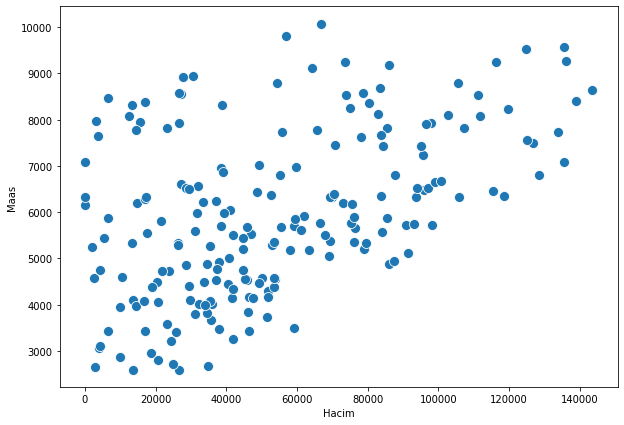

In [66]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='Hacim',y='Maas',data=dataFrame,s=100) ## Noktasal grafik

Model Oluşturma

In [27]:
x = dataFrame.iloc[:,3:5].values ## Bağımsız ## Hacim Maas

In [62]:
from sklearn.cluster import AgglomerativeClustering

Text(0.5, 1.0, 'Euclidean-Ward')

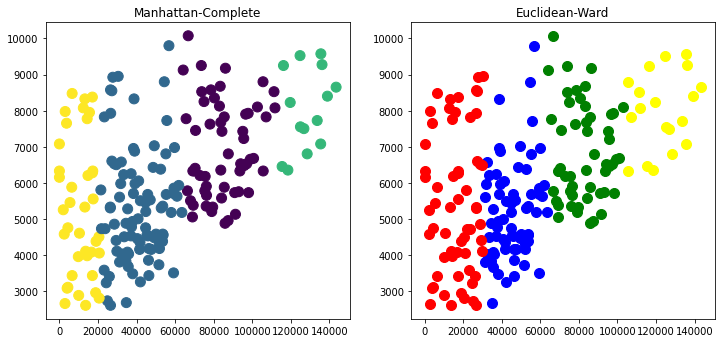

In [63]:
plt.figure(figsize=(12, 12))

y_pred = AgglomerativeClustering(n_clusters=4, affinity='manhattan',linkage='complete').fit_predict(x)

plt.subplot(221)
plt.scatter(x[:, 0], x[:, 1], c=y_pred,s=100)
plt.title("Manhattan-Complete")

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
guess = ac.fit_predict(x)

plt.subplot(222)
plt.scatter(x[guess == 0,0],x[guess == 0,1],s=100,c='green')
plt.scatter(x[guess == 1,0],x[guess == 1,1],s=100,c='blue')
plt.scatter(x[guess == 2,0],x[guess == 2,1],s=100,c='red')
plt.scatter(x[guess == 3,0],x[guess == 3,1],s=100,c='yellow')
plt.title("Euclidean-Ward")

In [64]:
import scipy.cluster.hierarchy as sch

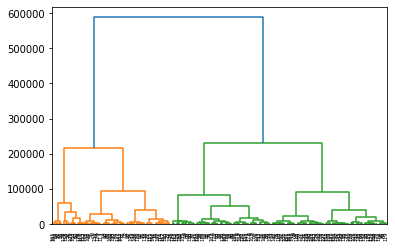

In [65]:
dendogram = sch.dendrogram(sch.linkage(x,method='ward'))